In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets as datasets
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import utils

In [2]:
df = pd.read_csv('../list_1/data/final_data.csv')
df

,Name,Sequence,Length,Classification,Molecular_Weight,Isoelectric_Point,Amino_Acid_Composition,Hydrophobicity,Instability_Index
0,Designed AMP No.1,FAAKHNGKSLFKPQN,15,1,1686.9107,10.302064,"{'A': 2, 'C': 0, 'D': 0, 'E': 0, 'F': 2, 'G': ...",-1.013333,7.233333
1,Synthetic construct&&4A,AAAAGSVWGAVNYTSDCNGECKRRGYKGGYCGSFANVNCWCET,43,1,4527.9440,7.842273,"{'A': 6, 'C': 5, 'D': 1, 'E': 2, 'F': 1, 'G': ...",-0.346512,29.088372
2,gag,AAANPGLLETSEGCRQIL,18,1,1843.0668,4.531511,"{'A': 3, 'C': 1, 'D': 0, 'E': 2, 'F': 0, 'G': ...",0.077778,39.944444
3,gag,AAAPAATLEEHMTACQGV,18,1,1770.9810,4.507355,"{'A': 6, 'C': 1, 'D': 0, 'E': 2, 'F': 0, 'G': ...",0.338889,63.388889
4,"jellyfish, Aurelia aurita&&Aurelin (jellyfish,...",AACSDRAHGHICESFKSFCKDSGRNGVKLRANCKKTCGLC,40,1,4302.9452,9.126870,"{'A': 4, 'C': 6, 'D': 2, 'E': 1, 'F': 2, 'G': ...",-0.457500,31.572500
...,...,...,...,...,...,...,...,...,...
45133,tr|A0A8C7AXN2|A0A8C7AXN2_NEOVI,MASQNRDPAAASVAAARKGAEHSGGAARGPVGKRLQQELMTLMNQT...,50,0,5173.9116,10.834315,"{'A': 10, 'C': 0, 'D': 1, 'E': 2, 'F': 0, 'G':...",-0.194000,31.558000
45134,tr|H0SRF9|H0SRF9_BRAS3,MLLRLTGHDDARVDLTPVDLSSFEGSLREADQRQYATDDEIKAIWA...,50,0,5674.2754,4.791664,"{'A': 5, 'C': 0, 'D': 7, 'E': 3, 'F': 1, 'G': ...",-0.546000,26.850000
45135,tr|A0A9Q6F244|A0A9Q6F244_9BACI,MKFLLDFFANWTFDKVMDYSLVAVIWFVFKSKSKQNEYLDDFEERR...,50,0,6339.1720,6.160176,"{'A': 2, 'C': 0, 'D': 6, 'E': 3, 'F': 7, 'G': ...",-0.496000,29.508000
45136,tr|X0PCK7|X0PCK7_9LACO,MVNIQLNELDVNGKQTPDLKTHILGYQDEMIILDNKKSISMDDIRH...,50,0,5794.5893,4.734995,"{'A': 0, 'C': 0, 'D': 6, 'E': 3, 'F': 0, 'G': ...",-0.430000,60.216000


In [3]:
df.columns
x_features = ['Length', 'Molecular_Weight', 'Isoelectric_Point', 'Hydrophobicity', 'Instability_Index']
y = 'Classification'

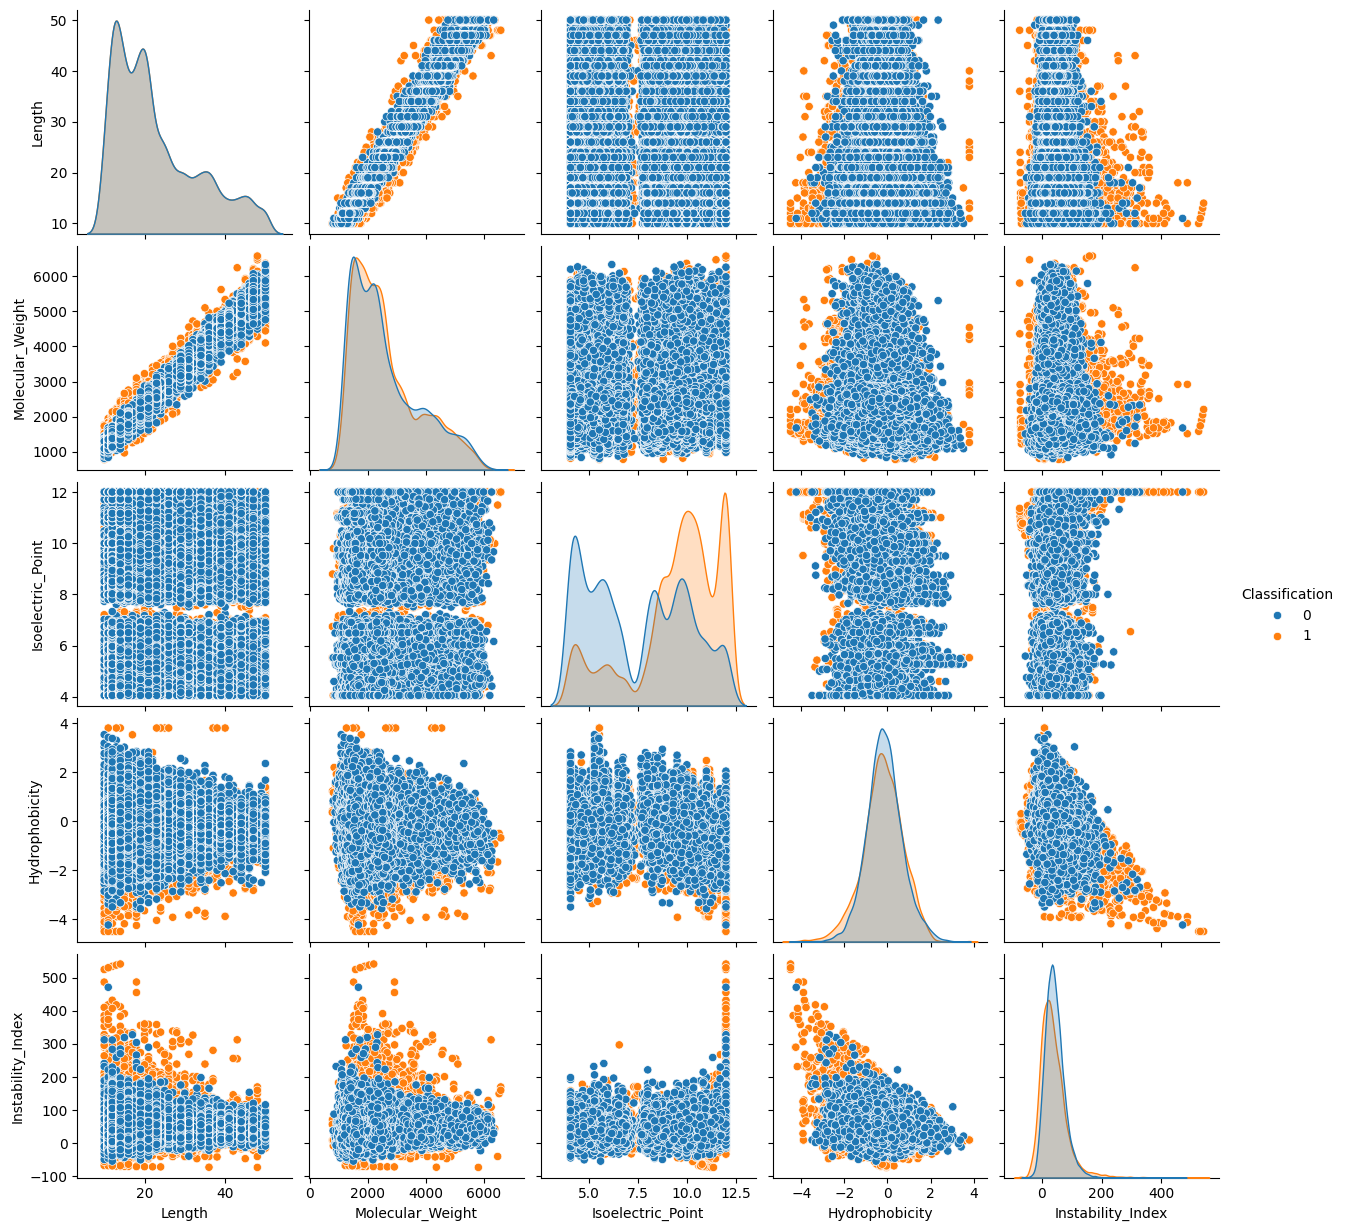

In [4]:
sns.pairplot(df, hue=y)

In [5]:
df[x_features].corr(method='pearson').style.background_gradient(cmap='coolwarm')

,Length,Molecular_Weight,Isoelectric_Point,Hydrophobicity,Instability_Index
Length,1.000000,0.984825,-0.062176,-0.069277,-0.021779
Molecular_Weight,0.984825,1.000000,-0.017502,-0.146371,0.034991
Isoelectric_Point,-0.062176,-0.017502,1.000000,-0.211365,0.093287
Hydrophobicity,-0.069277,-0.146371,-0.211365,1.000000,-0.392647
Instability_Index,-0.021779,0.034991,0.093287,-0.392647,1.000000


In [6]:
x_val = df[x_features].values
y_val = df[y].values

# PCA of Unstandardized Data

## 2D

In [7]:
df_us2d, pca_us2d = utils.perform_pca(x_val, y, y_val, n_components=2)
df_us2d.head()

,principal component 1,principal component 2,Classification
0,-923.342375,-32.705291,1
1,1917.851760,-14.351396,1
2,-767.126352,-0.256671,1
3,-839.180986,23.259312,1
4,1692.838364,-11.572048,1


In [8]:
utils.print_pca_exp_variance(pca_us2d)

Expplained variance ratio
[0.99880512 0.00118734]

Total explained variance
100.00%


In [9]:
pd.DataFrame(pca_us2d.components_, columns=x_features, index=['PC1', 'PC2']).T.style.background_gradient(cmap='coolwarm')

,PC1,PC2
Length,0.008837,-0.014688
Molecular_Weight,0.999960,-0.001079
Isoelectric_Point,-0.000039,0.006094
Hydrophobicity,-0.000112,-0.008614
Instability_Index,0.001208,0.999836


c:\Users\Ignacy\Desktop\programowanie\Studia\sem6\AI_1\lab\list_2\utils.py:29: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.scatterplot(


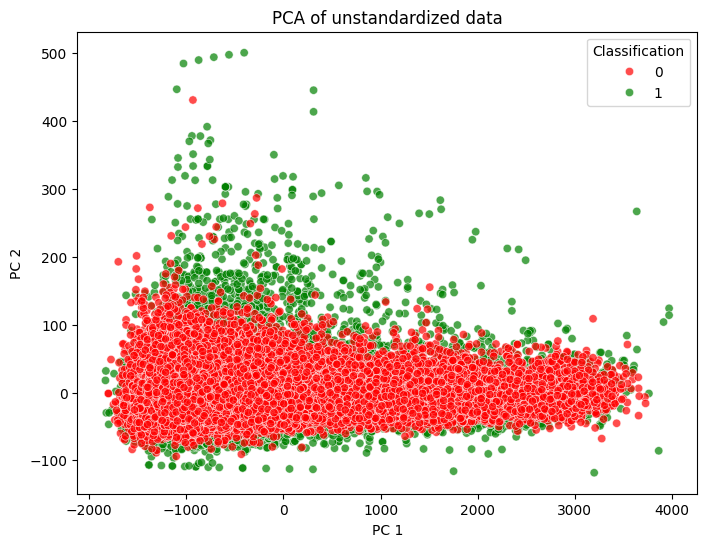

In [10]:
utils.plot_pca_2d(df_us2d, y, "PCA of unstandardized data")

In [11]:
df_us3d, pca_us3d = utils.perform_pca(x_val, y, y_val, n_components=3)
df_us3d.head()

,principal component 1,principal component 2,principal component 3,Classification
0,-923.342375,-32.705291,2.075914,1
1,1917.851760,-14.351396,-1.223858,1
2,-767.126352,-0.256671,-4.323289,1
3,-839.180986,23.259312,-4.785756,1
4,1692.838364,-11.572048,0.252731,1


In [12]:
utils.print_pca_exp_variance(pca_us3d)

Expplained variance ratio
[9.98805123e-01 1.18733840e-03 5.13268771e-06]

Total explained variance
100.00%


In [13]:
pd.DataFrame(pca_us3d.components_, columns=x_features, index=['PC1', 'PC2', "PC3"]).T.style.background_gradient(cmap='coolwarm')

,PC1,PC2,PC3
Length,0.008837,-0.014688,-0.265677
Molecular_Weight,0.999960,-0.001079,0.002388
Isoelectric_Point,-0.000039,0.006094,0.960425
Hydrophobicity,-0.000112,-0.008614,-0.082971
Instability_Index,0.001208,0.999836,-0.010468


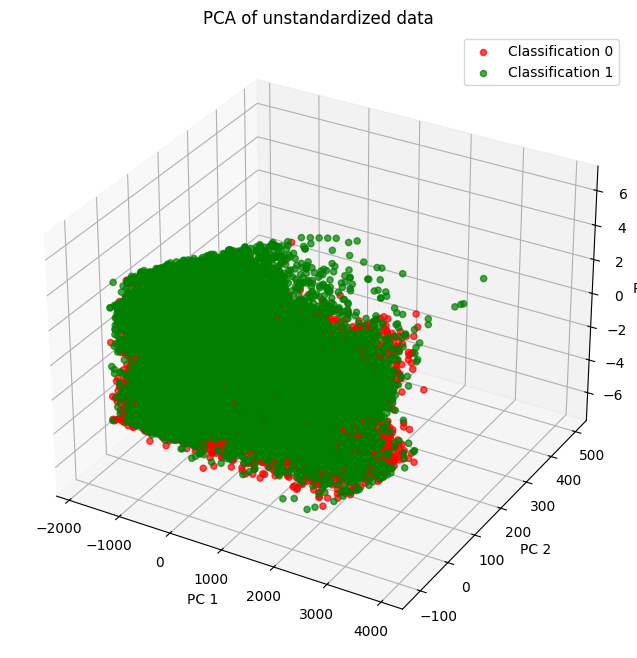

In [14]:
utils.plot_pca_3d(df_us3d, y, "PCA of unstandardized data")

# PCA of Standarized Data

## 2D

In [15]:
x_standarized = StandardScaler().fit_transform(x_val)
df_s2d, pca_s2d = utils.perform_pca(x_standarized, y, y_val, n_components=2)
df_s2d.head()

,principal component 1,principal component 2,Classification
0,-0.981541,-0.555142,1
1,2.488946,0.580127,1
2,-0.818507,0.736951,1
3,-0.868501,0.567814,1
4,2.177365,0.193715,1


In [16]:
utils.print_pca_exp_variance(pca_s2d)

Expplained variance ratio
[0.40268085 0.29583151]

Total explained variance
69.85%


In [17]:
pd.DataFrame(pca_s2d.components_, columns=x_features, index=['PC1', 'PC2']).T.style.background_gradient(cmap='coolwarm')

,PC1,PC2
Length,0.689670,0.147351
Molecular_Weight,0.698357,0.076642
Isoelectric_Point,-0.010799,-0.425691
Hydrophobicity,-0.175291,0.644995
Instability_Index,0.076214,-0.612521


c:\Users\Ignacy\Desktop\programowanie\Studia\sem6\AI_1\lab\list_2\utils.py:29: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.scatterplot(


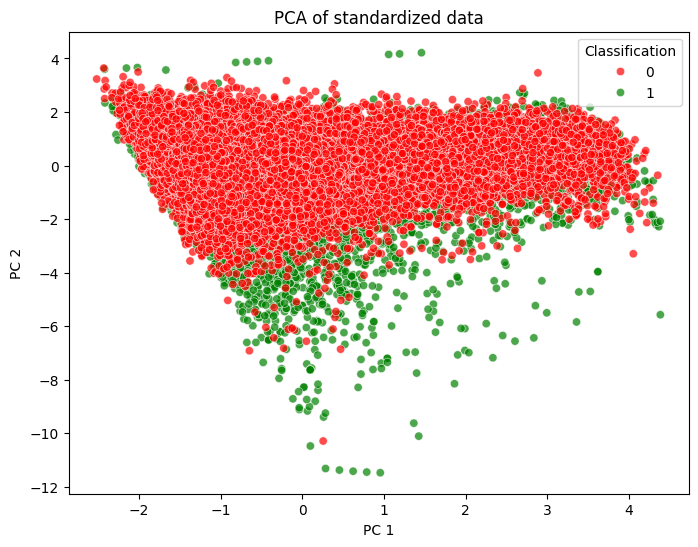

In [18]:
utils.plot_pca_2d(df_s2d, y, "PCA of standardized data")

## 3D

In [19]:
df_s3d, pca_s3d = utils.perform_pca(x_standarized, y, y_val, n_components=3)

In [20]:
utils.print_pca_exp_variance(pca_s3d)

Expplained variance ratio
[0.40268085 0.29583151 0.18368368]

Total explained variance
88.22%


In [21]:
pd.DataFrame(pca_s3d.components_, columns=x_features, index=['PC1', 'PC2', 'PC3']).T.style.background_gradient(cmap='coolwarm')

,PC1,PC2,PC3
Length,0.689670,0.147351,0.044722
Molecular_Weight,0.698357,0.076642,0.048695
Isoelectric_Point,-0.010799,-0.425691,0.871902
Hydrophobicity,-0.175291,0.644995,0.110866
Instability_Index,0.076214,-0.612521,-0.472361


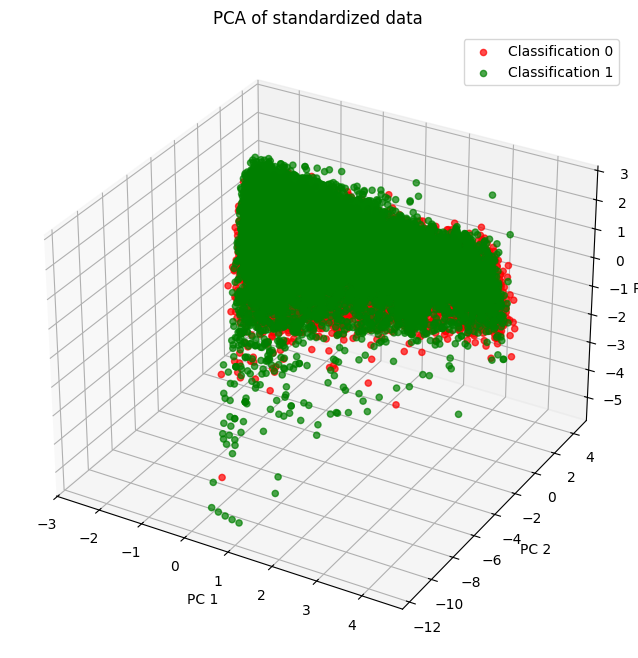

In [22]:
utils.plot_pca_3d(df_s3d, y, "PCA of standardized data")

We observe that PCA for both standardized and unstandardized in 2d and 3d fail to separate data.